# What's the Best Opening Word in Wordle?
It's not as straight forward as you might think.  The answer this question we'll need a reasonably complete list of five-letter English words.  Here's one: https://www-cs-faculty.stanford.edu/~knuth/sgb-words.txt

I'm not actually sure how complete it is, but it comes from Donald Knuth, computer scientist-extraordinaire (and inventor of TeX).  Good enough for me.  Let's get it

In [18]:
# The usual import statements
import numpy as np
import matplotlib.pyplot as plt
import requests
from string import ascii_lowercase as alphabet
from collections import Counter,defaultdict
from itertools import combinations,permutations
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]

words = requests.get("https://www-cs-faculty.stanford.edu/~knuth/sgb-words.txt").text.split()
print(f"This file contains {len(words)} words")

This file contains 5757 words


This list contains 5757 words, but Google tells me there are closer to 12,000 five letter words.  Well, we'll work with what we have, but if anyone can provide a more complete list, let me know.

## Single-Letter Frequency
Let's start by looking at how frequently each letter occurrs.

Text(0.5, 1.0, 'frequency of letters in 5-letter words')

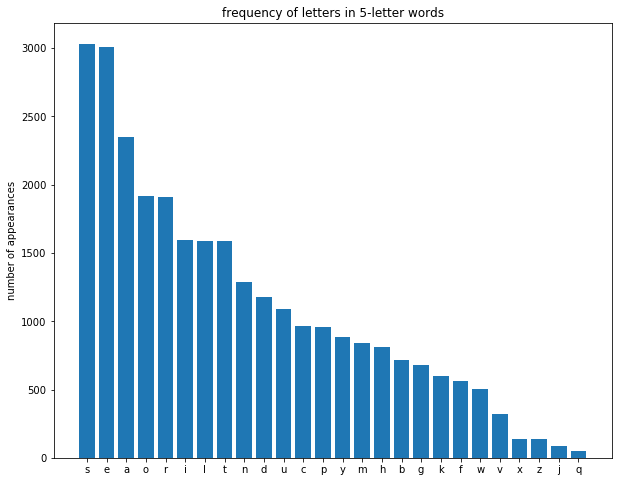

In [48]:
letters = [letter for word in words for letter in word]
counts = Counter(letters)
plt.bar(*zip(*counts.most_common()))
plt.ylabel("number of appearances")
plt.title("frequency of letters in 5-letter words")

's', 'e', 'a', 'o', and 'r' are the five most common words.  You might object that this double counts letters if they appear in the same word more than once.  I'm not sure that matters, but if you're concerned, we can easily get rid of duplicates within each word.

Text(0.5, 1.0, 'frequency of letters in 5-letter words (ignoring duplicates)')

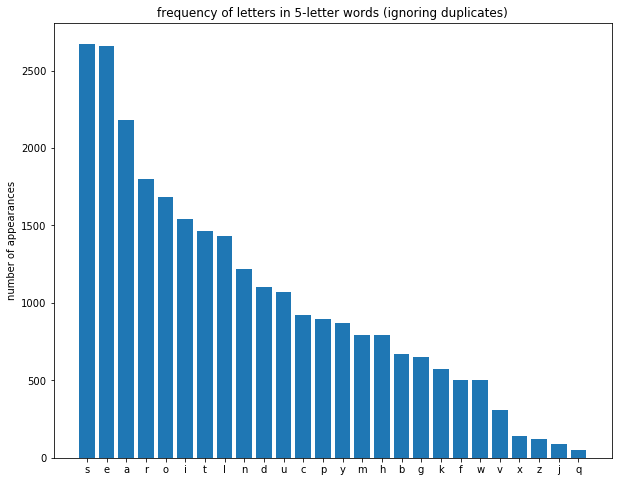

In [49]:
letters = [letter for word in words for letter in set(word)]
counts = Counter(letters)
plt.bar(*zip(*counts.most_common()))
plt.ylabel("number of occurences")
plt.title("frequency of letters in 5-letter words (ignoring duplicates)")

This doesn't change things much -- 's', 'e', 'a', 'r', and 'o' are still the most common.  

You can consult a Scrabble word-finding website like https://scrabblewordfinder.org/ to find five letter words with those letters.  It turns out there is only one: **arose**.  So, are we done?  Is 'arose' the best opening word in Wordle?  I'm not so sure...

## Letter Combinations
's', 'e', 'a', 'r', and 'o' all appear frequently, but they don't appear frequently *together* -- infact, they appear together in only one valid word.  We might want to consider choosing a word whose letters appear together in many different combinations.  We can see how often all the potential two, three, four, and five letter combinations show up in our word list.

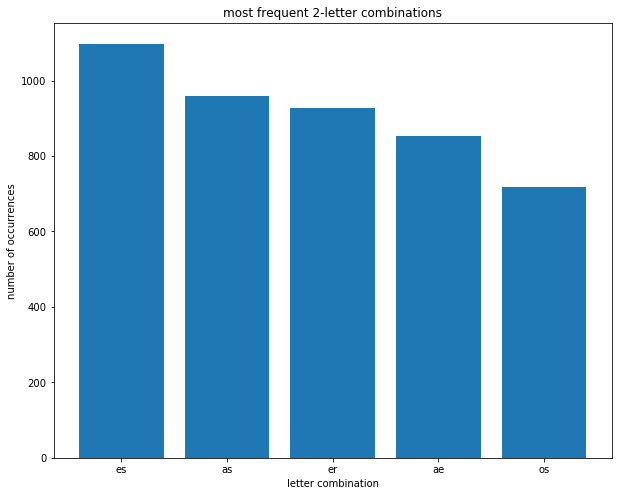

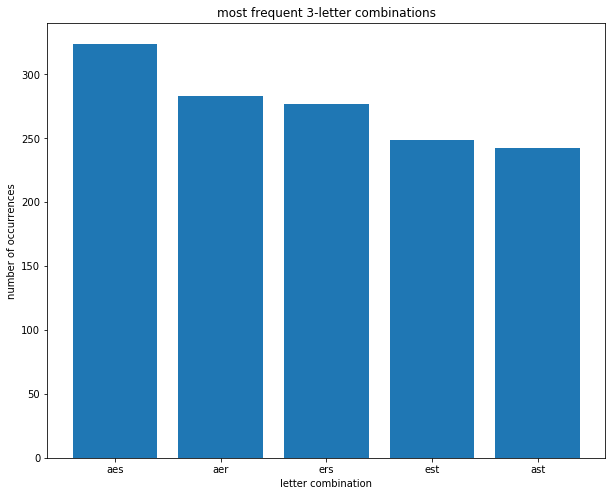

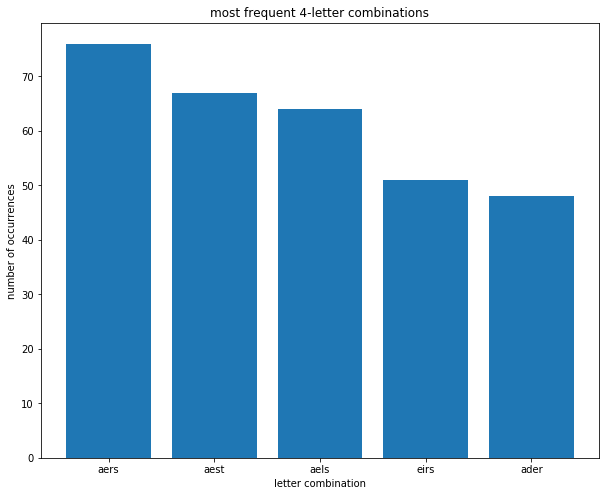

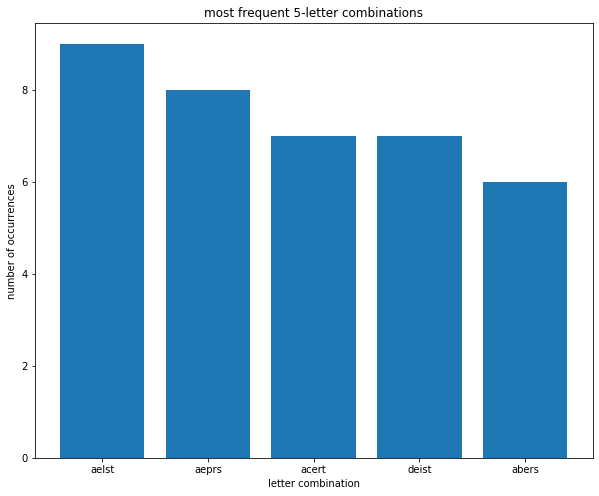

In [16]:
# Note: this is embarassingly brute force, but it gets the job done
for num_letters in (2,3,4,5):
    combo_counts = defaultdict(int)
    for combo in combinations(alphabet,num_letters):
        combo_counts[combo] = sum([all(letter in word for letter in combo) for word in words])
    top_5 = [("".join(k),v) for k,v in sorted(combo_counts.items(), key=lambda item: item[1], reverse=True)][:5]
    plt.bar(*zip(*top_5))
    plt.xlabel("letter combination")
    plt.ylabel("number of occurrences")
    plt.title(f"most frequent {num_letters}-letter combinations")
    plt.show()

OK, here is what see so far
* The most common letters are 's', 'e', 'a', 'r', and 'o'.  They appear together in exactly one word: arose
* The most common two-letter combinations (ignoring order!) are 'es', 'as', 'er', 'ae', and 'os'. No new letters in that list.
* The most common three-letter combinations are 'aes', 'aer', 'ers', 'est', and 'ast'.  So 't' is now in the list and 'o' has dropped off.
* The most common four-letter combinations are 'aers', 'aest', 'aels, 'eirs', and 'ader'.  So now see 'l' and 'd' in our list.
* The most common five-letter combinations are 'aelst', 'aeprs', 'acert', 'deist', and 'abers'.  Add 'p', 'c', and 'b' to the list.

This makes 'o' look like a less-good choice for including in our first guess, and it makes 't', as well as maybe 'l' and 'd', since they frequently show up in four-letter combinations and are all in the top-10 overall of individual letters.  I don't think it makes much sense to consider 'p', 'c', and 'b' for our first guess -- even though they show up frequently in 5-letter combinations, the absolute number of words we're talking about is in the single digits, and none are in the top-10 overall.

So, the list of letters we want to consider including in our first word is now: 's', 'e', 'a', 'r', 'o', 't', and maybe 'l' and 'd'.

## Order Matters
The above analysis looked at *combinations* where the order of the letters did not matter.  For example, 'es' is the most common two-letter combination, but that means that 'e' and 's' appear *anywhere* in the word, not just in the specific combination of 'e' followed by 's'.

This is probably OK if we are most concerned with getting yellow squares, but if we want to maximize our chance of getting green squares on the first guess, we should pay attention to order (and eventually position).  In other words, we want to look at *permuations*.

It makes no sense to look at 5-letter permutations, because that's just a unique 5-letter word.

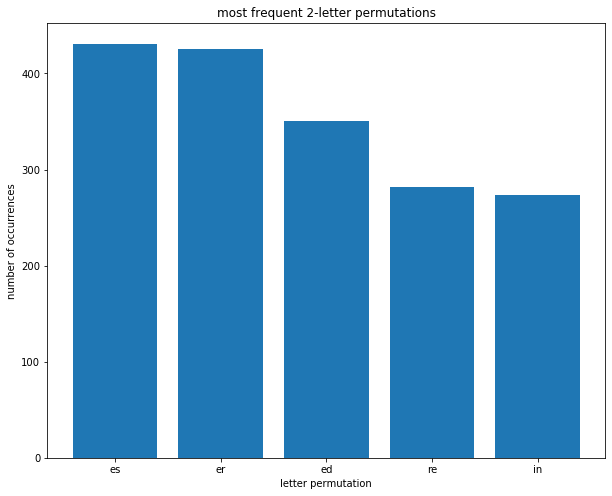

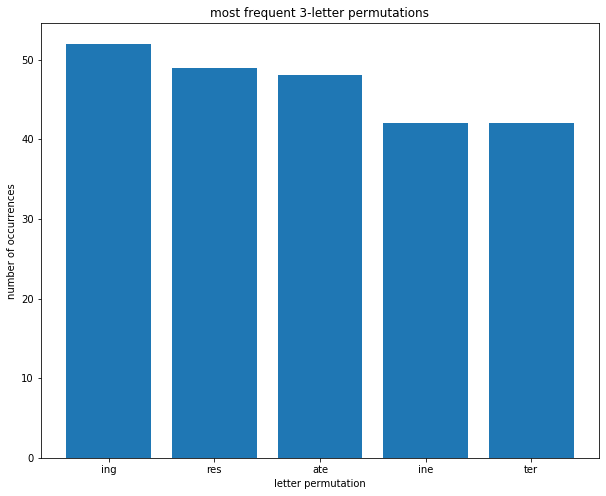

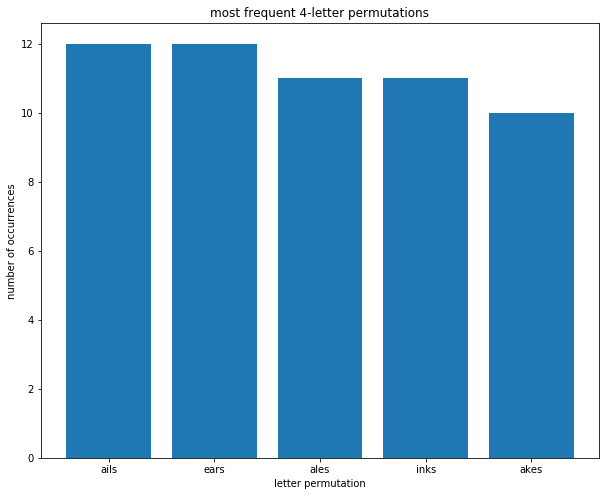

In [22]:
# Note: this is also embarassingly brute force, but it also gets the job done
for num_letters in (2,3,4,):
    perm_counts = defaultdict(int)
    for perm in permutations(alphabet,num_letters):
        perm = "".join(perm)
        perm_counts[perm] = sum([perm in word for word in words])
    top_5 = [("".join(k),v) for k,v in sorted(perm_counts.items(), key=lambda item: item[1], reverse=True)][:5]
    plt.bar(*zip(*top_5))
    plt.xlabel("letter permutation")
    plt.ylabel("number of occurrences")
    plt.title(f"most frequent {num_letters}-letter permutations")
    plt.show()

Let's summarize:
* 'es', 'er', and 'ed' are the most common two-letter permutations.
* 'ing', 'res', and 'ate' are the most common three-letter permutations.
* 'ails', 'ears', and 'ales' are the most common four-letter permutations.

We were on the fence about including 'd' in our list of letters to consider for the first word, but it's appearance in the third most common permuation strengthens the case.

You might be tempted to think that we should think about including 'n' and 'g', since 'ing' is the most common three letter permutation, but I would argue against it.  The absolute number of occurrencs is small, 'g' in particular is not very common overall, and 'res' appears almost as often while already containing the most common two letter permutation ('es') and the two most common individual letters overall.

As with the five-letter combinations we looked at in the last section, the four-letter permutations occur pretty infrequently, and they don't add any new letters to our list of good choices for the first word, so I'm not going to give them much heed.

Notice that 'o' doesn't appear anywhere here, and 'l' only appears in the four-letter permuation.  I'm going to drop it from consideration for our first word.

So, our slightly trimmed down list of letters to consider for inclusion in our first guess is  's', 'e', 'a', 'r',  't', and 'd'.

## Position Matters
As I alluded to above, not only does order matter, but position matters, at least if we want green squares.  Let's look at the most common letter at each position in the word.

Text(0.5, 1.0, 'frequency of letters by position in word')

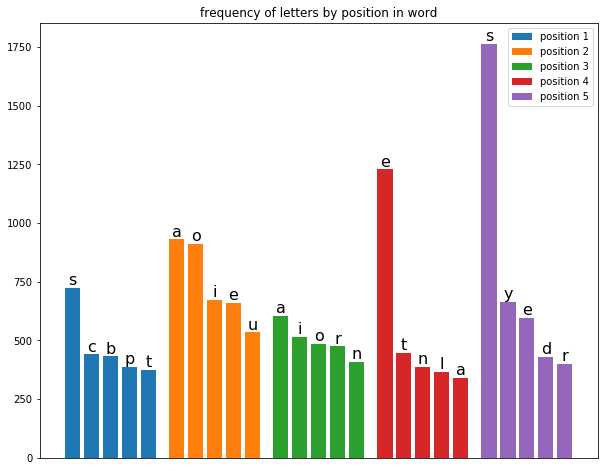

In [43]:
split_words = np.array([np.array(list(word)) for word in words])
top_5_by_position = [Counter(split_words[:,i]).most_common(5) for i in range(split_words.shape[1])]
fig,ax = plt.subplots()
for pos,top_5 in enumerate(top_5_by_position):
    letters,counts = zip(*top_5)
    ax.bar(pos*(len(letters)+0.5)+np.arange(len(letters)),counts,label=f"position {pos+1}")
rects = ax.patches
for rect,letter in zip(rects,np.ravel(top_5_by_position)[::2]):
    h = rect.get_height()
    ax.text(rect.get_x()+rect.get_width()/2,rect.get_height(),letter,size=16,ha="center",va="bottom")
ax.axes.get_xaxis().set_visible(False)
plt.legend()
plt.title("frequency of letters by position in word")


The most common letters are 's', 'a', 'a', 'e', and 's' in positions one through five, respectively.  But far more words end in 's' than start with any other given letter, and 'es' is an especially common ending pair.  No surprise there -- we already knew 'es' was a common permutation, and now we know that it usually appears at the end of a word.

This suggests that our opening word should end in 'es', as this gives us the two most common letters *and* the most common two-letter permutation *and* places them in their most common position.

### Letter Frequency Conditional on Ending in '-es'
Let's go further.  What is the frequency of letters in the first three positions, conditional on a word ending in '-es'?

In [42]:
words_ending_in_es = [word for word in words if word.endswith("es")]
print(f"There are {len(words_ending_in_es)} words ending in '-es'")

There are 371 words ending in '-es'


Text(0.5, 1.0, "frequency of letters by position in words ending in '-es'")

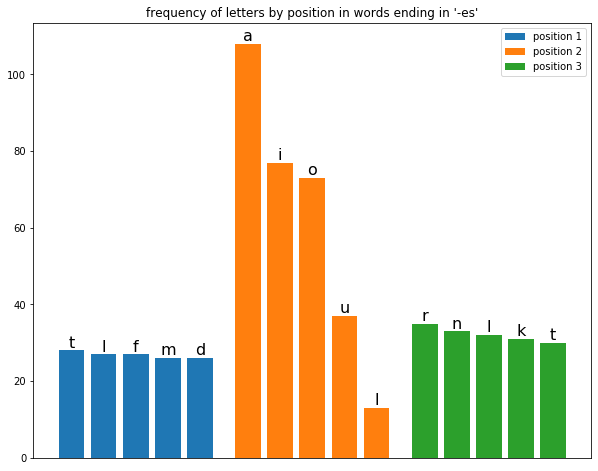

In [46]:
split_words = np.array([np.array(list(word)) for word in words_ending_in_es])
top_5_by_position = [Counter(split_words[:,i]).most_common(5) for i in range(split_words.shape[1]-2)]
fig,ax = plt.subplots()
for pos,top_5 in enumerate(top_5_by_position):
    letters,counts = zip(*top_5)
    ax.bar(pos*(len(letters)+0.5)+np.arange(len(letters)),counts,label=f"position {pos+1}")
rects = ax.patches
for rect,letter in zip(rects,np.ravel(top_5_by_position)[::2]):
    h = rect.get_height()
    ax.text(rect.get_x()+rect.get_width()/2,rect.get_height(),letter,size=16,ha="center",va="bottom")
ax.axes.get_xaxis().set_visible(False)
plt.legend()
plt.title("frequency of letters by position in words ending in '-es'")


'a' is by far the most common second letter, while 't', 'l', 'f', 'm', and 'd' all appear with about the same frequency as the first letter, and 'r', 'n', 'l', 'k', and 't' also appear with similar frequency as the third letter (though the distribution isn't quite as flat as in the case of first letters).

## Putting it All Together
Let's summarize
* When looking only the frequency of individual letters, 's', 'e', 'a', 'r', and 'o' seemed liked good choices.  But they only appear together in one word.
* When we considered combinations of letters where order didn't matter, we decided to add 't' to the above list, and were on the fence about 'l' and 'd'.
* When we considered permuations of letters where order does matter, we decided to drop 'o' and 'l', but 'd' looked like a good choice.
* When we considered the position of letters in a word, it was clear that we wanted a word ending in 'es'.
* When we looked at words ending in 'es', it was clear that we wanted 'a' to be the second letter.  We have a slight preference for 'r' in the third position and 't' in the first position, though 'd' would be a good choice too, and 'l' might even be worth bringing back in.

So, my recommended opening word or Wordle is... **tares**!  It's wonderful!
* It contains the three most common individual letters...
* ...and 5 of the top 8
* It contains all the letters in the top 5 most common three letter combinations...
* ...and all the letters in the two most common 4-letter combinations...
* ...and 4 out of the 5 letters in the most common 5-letter combination
* It contains the most common two- and three-letter permutations
* It contains the most common ending
* It contains the most common second letter

I would say that 'lares' and 'dares' are good choices, too.

What about a word for your second guess?  I'd say that is *way* too dependent on the outcome of the first guess, but here are some rules of thumb I'd keep in mind:
* If neither 'e' or 'a' appear in the word, try something with 'i' and/or 'o'
* Other good consonants to consider are 'l', 'd', and 'n'

It turns out that 'indol' is in the Scrabble dictionary, so if you got *nothing* on the first guess, you could try that.  'dales', 'loins', 'lines', 'dines', 'nosed', and 'oiled' might also be worth keeping in mind.  You might also consider trying something with 'c', 'p' or 'b', since those all appear in frequent 5-letter combinations.

Now, go play Wordle!
https://www.powerlanguage.co.uk/wordle/